<img style="float: right; margin: 0px 0px 15px 15px;" src="https://previews.123rf.com/images/icreative3d/icreative3d1403/icreative3d140300102/26861768-se%C3%B1al-de-atenci%C3%B3n-con-el-s%C3%ADmbolo-de-exclamaci%C3%B3n-en-blanco-.jpg" width="80px" height="80px" />
<img style="float: left; margin: 0px 0px 15px 15px;" src="../../OSI.png" width="80px" height="80px" />

<font size=5, color='blue'> Antes de empezar realizar la encuesta OSI<font/>


# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader.
#La comunidad lo importa con el nombre de web

import pandas as pd
import pandas_datareader.data as web

In [2]:
# Librerías estándar para arreglos y gráficos

import numpy as np
import matplotlib.pyplot as plt

Primero importaremos datos desde un archivo con extensión `.csv`

In [3]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [4]:
#Importar datos de un archivo csv

datos=pd.read_csv('FB.csv')
datos

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
5,2015-01-09,78.199997,78.620003,77.199997,77.739998,77.739998,21157000
6,2015-01-12,77.839996,78.000000,76.209999,76.720001,76.720001,19190200
7,2015-01-13,77.230003,78.080002,75.849998,76.449997,76.449997,25179600
8,2015-01-14,76.419998,77.199997,76.029999,76.279999,76.279999,25741000
9,2015-01-15,76.400002,76.570000,73.540001,74.050003,74.050003,34134000


Ahora lo haremos desde Yahoo Finance

In [5]:
import datetime as dtm
start=dtm.datetime(2015,1,1)
end=dtm.datetime.now()

In [6]:
#start='2015-01-01'
#end='2018-12-31'
source='yahoo'
data=web.DataReader('FB',data_source=source,start=start,end=end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000
2015-01-09,78.620003,77.199997,78.199997,77.739998,21157000,77.739998
2015-01-12,78.000000,76.209999,77.839996,76.720001,19190200,76.720001
2015-01-13,78.080002,75.849998,77.230003,76.449997,25179600,76.449997
2015-01-14,77.199997,76.029999,76.419998,76.279999,25918600,76.279999


In [7]:
# Escribir una función para generalizar la exportación de datos desde Yahoo

def get_closes(names,start,end):
    source='yahoo'
    close=web.DataReader(names,data_source=source,start=start,end=end)
    return close['Close']

In [8]:
# Instrumentos a descargar
names=['AAPL','GOOG','FB','AMZN'] # Apple, Google, Facebook, Amazon

# Fechas: inicios 2013 a finales de 2018
start='2013-01-01'
end='2018-12-31'

#### La API de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [9]:
closes=get_closes(names,start,end)
closes

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-02,78.432854,257.309998,28.000000,360.274597
2013-01-03,77.442856,258.480011,27.770000,360.483826
2013-01-04,75.285713,259.149994,28.760000,367.607117
2013-01-07,74.842857,268.459991,29.420000,366.003143
2013-01-08,75.044289,266.380005,29.059999,365.280823
2013-01-09,73.871429,266.350006,30.590000,367.681824
2013-01-10,74.787140,265.339996,31.299999,369.355560
2013-01-11,74.328575,267.940002,31.719999,368.613342
2013-01-14,71.678574,272.730011,30.950001,360.274597


¿Cómo lucen estos datos?

In [10]:
closes.plot?

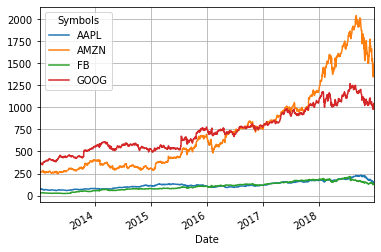

In [11]:
# Graficar
closes.plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [14]:
closes.describe?
#pd.DataFrame.describe?

In [15]:
closes.describe()

Symbols,AAPL,AMZN,FB,GOOG
count,1510.000000,1510.000000,1510.000000,1510.000000
mean,120.606999,735.603106,106.280152,729.748043
std,41.687185,477.669560,49.456984,236.029395
min,55.790001,248.229996,22.900000,350.122650
25%,92.825001,332.865005,69.002502,537.386093
50%,113.025002,589.214996,104.949997,706.035004
75%,151.672501,967.747498,148.382496,929.289993
max,232.070007,2039.510010,217.500000,1268.329956


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [16]:
closes

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-02,78.432854,257.309998,28.000000,360.274597
2013-01-03,77.442856,258.480011,27.770000,360.483826
2013-01-04,75.285713,259.149994,28.760000,367.607117
2013-01-07,74.842857,268.459991,29.420000,366.003143
2013-01-08,75.044289,266.380005,29.059999,365.280823
2013-01-09,73.871429,266.350006,30.590000,367.681824
2013-01-10,74.787140,265.339996,31.299999,369.355560
2013-01-11,74.328575,267.940002,31.719999,368.613342
2013-01-14,71.678574,272.730011,30.950001,360.274597


In [17]:
closes.shift()

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,78.432854,257.309998,28.000000,360.274597
2013-01-04,77.442856,258.480011,27.770000,360.483826
2013-01-07,75.285713,259.149994,28.760000,367.607117
2013-01-08,74.842857,268.459991,29.420000,366.003143
2013-01-09,75.044289,266.380005,29.059999,365.280823
2013-01-10,73.871429,266.350006,30.590000,367.681824
2013-01-11,74.787140,265.339996,31.299999,369.355560
2013-01-14,74.328575,267.940002,31.719999,368.613342


In [18]:
R=((closes-closes.shift())/closes.shift()).dropna()
R

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-03,-0.012622,0.004547,-0.008214,0.000581
2013-01-04,-0.027855,0.002592,0.035650,0.019760
2013-01-07,-0.005882,0.035925,0.022949,-0.004363
2013-01-08,0.002691,-0.007748,-0.012237,-0.001974
2013-01-09,-0.015629,-0.000113,0.052650,0.006573
2013-01-10,0.012396,-0.003792,0.023210,0.004552
2013-01-11,-0.006132,0.009799,0.013419,-0.002009
2013-01-14,-0.035653,0.017877,-0.024275,-0.022622
2013-01-15,-0.031550,-0.003043,-0.027464,0.002323


y la gráfica de los rendimientos se puede obtener como...

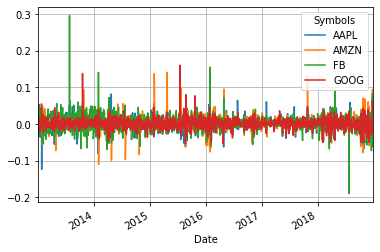

In [19]:
# Gráfica
R.plot(grid=True)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [20]:
logR=np.log(closes/closes.shift()).dropna()
logR

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-03,-0.012703,0.004537,-0.008248,0.000581
2013-01-04,-0.028250,0.002589,0.035029,0.019568
2013-01-07,-0.005900,0.035295,0.022689,-0.004373
2013-01-08,0.002688,-0.007778,-0.012312,-0.001975
2013-01-09,-0.015752,-0.000113,0.051311,0.006552
2013-01-10,0.012320,-0.003799,0.022945,0.004542
2013-01-11,-0.006150,0.009751,0.013329,-0.002012
2013-01-14,-0.036304,0.017719,-0.024574,-0.022882
2013-01-15,-0.032058,-0.003048,-0.027848,0.002320


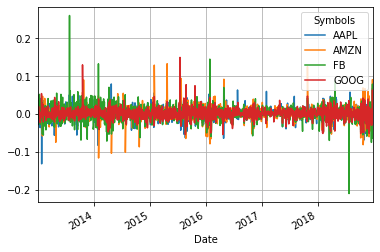

In [21]:
# Gráfica
logR.plot(grid=True)

In [22]:
# Valor absoluto de la diferencia
D=np.abs(R-logR)
D

Symbols,AAPL,AMZN,FB,GOOG
Date,,,,
2013-01-03,8.033714e-05,1.030681e-05,3.392301e-05,1.685685e-07
2013-01-04,3.952983e-04,3.353466e-06,6.207502e-04,1.927015e-04
2013-01-07,1.736908e-05,6.302572e-04,2.593572e-04,9.546894e-06
2013-01-08,3.615303e-06,3.017049e-05,7.548353e-05,1.949989e-06
2013-01-09,1.234188e-04,6.341712e-09,1.339192e-03,2.150815e-05
2013-01-10,7.620136e-05,7.208010e-06,2.652593e-04,1.032962e-05
2013-01-11,1.887545e-05,4.769664e-05,8.923117e-05,2.021743e-06
2013-01-14,6.510731e-04,1.579173e-04,2.994911e-04,2.598015e-04
2013-01-15,5.084100e-04,4.640454e-06,3.841767e-04,2.693772e-06


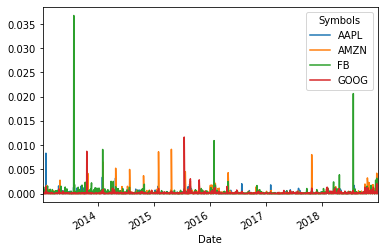

In [23]:
D.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [24]:
# Media y volatilidad de rendimientos
mu=R.mean()
mu

Symbols
AAPL    0.000585
AMZN    0.001351
FB      0.001238
GOOG    0.000805
dtype: float64

In [25]:
muL=logR.mean()
muL

Symbols
AAPL    0.000463
AMZN    0.001169
FB      0.001023
GOOG    0.000700
dtype: float64

In [26]:
ds=R.std()
ds

Symbols
AAPL    0.015584
AMZN    0.019115
FB      0.020927
GOOG    0.014610
dtype: float64

In [27]:
dsL=logR.std()
dsL

Symbols
AAPL    0.015633
AMZN    0.019038
FB      0.020651
GOOG    0.014473
dtype: float64

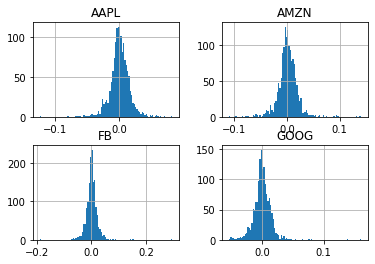

In [28]:
H=R.hist(bins=100)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.